In [1]:
import os
import matplotlib.pyplot as plt

# 12장 k-NN

## 12.1 모델

In [2]:
from typing import List
from collections import Counter

### 투표 집계 함수

In [3]:
testList = ['a', 'b', 'c', 'b']
sameList = ['a', 'b', 'c', 'b', 'a']

#### 투표집계함수: 동점처리불가

In [4]:
'''
가장 많이 등장하는 값을 반환한다.
동점인 항목을 똑똑하게 처리하지 못하는 문제가 있다.
'''
def raw_majority_vote(labels: List[str]) -> str:
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

assert raw_majority_vote(testList) == 'b'
assert raw_majority_vote(sameList) == 'a'

#### 투표집계함수: 동정처리가능

In [5]:
'''
단독 1등이 생길 때까지 k를 하나씩 줄인다.
['a', 'b', 'c', 'b', 'a'] >>> ['a', 'b', 'c', 'b'] >>> ['a', 'b', 'c'] >>> ...
'''
def majority_vote(labels: List[str]) -> str:
    winner, value = Counter(labels).most_common(1)[0]
    num_winners = len([count for count in Counter(labels).values() if(count == value)])
    #/print winner
    if(num_winners == 1):
        return winner
    else:
        return majority_vote(labels[:-1])

In [6]:
os.chdir("C:\\Users\\jongh\\OneDrive\\python\\machine-learning\\Data-Science-from-Scratch-master\\code-python3")

from typing import NamedTuple
from linear_algebra import distance
from machine_learning import split_data

os.chdir("C:\\Users\\jongh\\OneDrive\\python\\machine-learning")

In [7]:
Vector = List[float]

In [8]:
class LabeledPoint(NamedTuple):
    point: Vector
    label: str

## 12.2 예시: Iris 데이터

In [9]:
def knn_classify(k: int,
                 labeled_points: List[LabeledPoint],
                 new_point: Vector) -> str:
    
    # 레이블된 포인트를 가장 가까운 데이터부터 가장 먼 데이터 순서로 정렬
    by_distance = sorted(labeled_points,
                         key=lambda lp:distance(lp.point, new_point))
    
    # 가장 가까운 k 데이터 포인트의 레이블을 살펴보고
    k_nearest_labels = [lp.label for lp in by_distance[:k]]
    
    # 투표한다.
    return majority_vote(k_nearest_labels)

In [10]:
def knn_classify(k: int,
                 labeled_points: List[LabeledPoint],
                 new_point: Vector) -> str:
    
    # 레이블된 포인트를 가장 가까운 데이터부터 가장 먼 데이터 순서로 정렬
    by_distance = sorted(labeled_points,
                         key=lambda lp:distance(lp.point, new_point))
    
    # 가장 가까운 k 데이터 포인트의 레이블을 살펴보고
    k_nearest_labels = [lp.label for lp in by_distance[:k]]
    
    # 투표한다.
    return majority_vote(k_nearest_labels)

### 데이터 불러오기

In [11]:
import requests

In [12]:
datapath = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = requests.get(datapath)

In [13]:
'''
서버에서 받은 iris.data 파일이 파일 뒤에 두줄의 공백이 생김 제거하여야 제대로 작동
'''
#with open('iris.dat', 'w') as f:
#     f.write(data.text)

'\n서버에서 받은 iris.data 파일이 파일 뒤에 두줄의 공백이 생김 제거하여야 제대로 작동\n'

In [14]:
from typing import Dict
import csv
from collections import defaultdict

In [15]:
def parse_iris_row(row: List[str]) -> LabeledPoint:
    '''
    꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비, 분류
    '''
    measurements = [float(value) for value in row[:-1]]
    # 분류는 "Iris-virginica"와 같이 나오는데 그중 "virginica"만 뽑아오자.
    label = row[-1].split("-")[-1]
    return LabeledPoint(measurements, label)

In [16]:
with open('iris.dat') as f:
    reader = csv.reader(f)
    iris_data = [parse_iris_row(row) for row in reader]

In [17]:
points_by_species: Dict[str, List[Vector]] = defaultdict(list)
for iris in iris_data:
    points_by_species[iris.label].append(iris.point)

### scatter plot 그려보기(예습)

In [18]:
speList = list(points_by_species.keys())
/print speList

['setosa', 'versicolor', 'virginica']


In [19]:
col = 1
row = 4
totalPlot = 4
metrics = ['sepal length', 'sepal width', 'petal length', 'petal width']

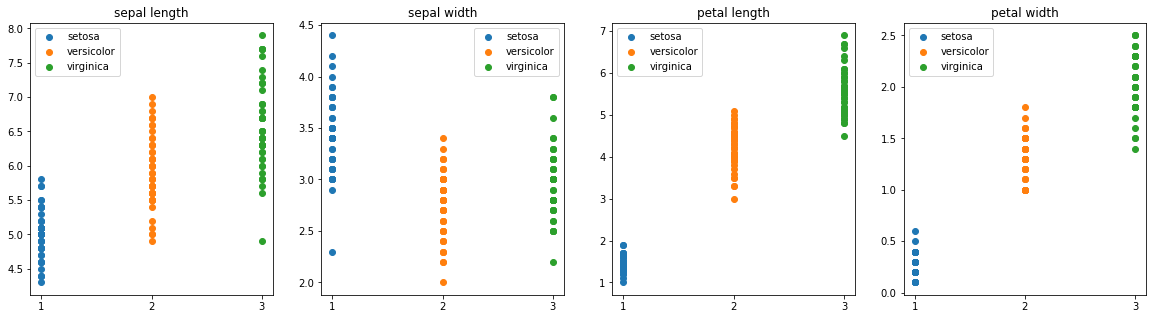

In [20]:
plt.figure(figsize=(20, 5))
for index in range(1, totalPlot+1):
    plotNumber = col*100 + row*10 + index
    plt.subplot(plotNumber)
    plt.title(metrics[index-1])
    plt.xticks([1, 2, 3])
    for i, species in enumerate(speList):
        speData = points_by_species[species]
        cateData = [data[index-1] for data in speData]
        x = [i+1 for _ in range(len(cateData))]
        plt.scatter(x, cateData)
        plt.legend(['setosa', 'versicolor', 'virginica'])


### Iris scatter plot

In [21]:
pairs = [(i, j) for i in range(4) for j in range(4) if i < j]

In [22]:
marks = ['+', '.', 'x']

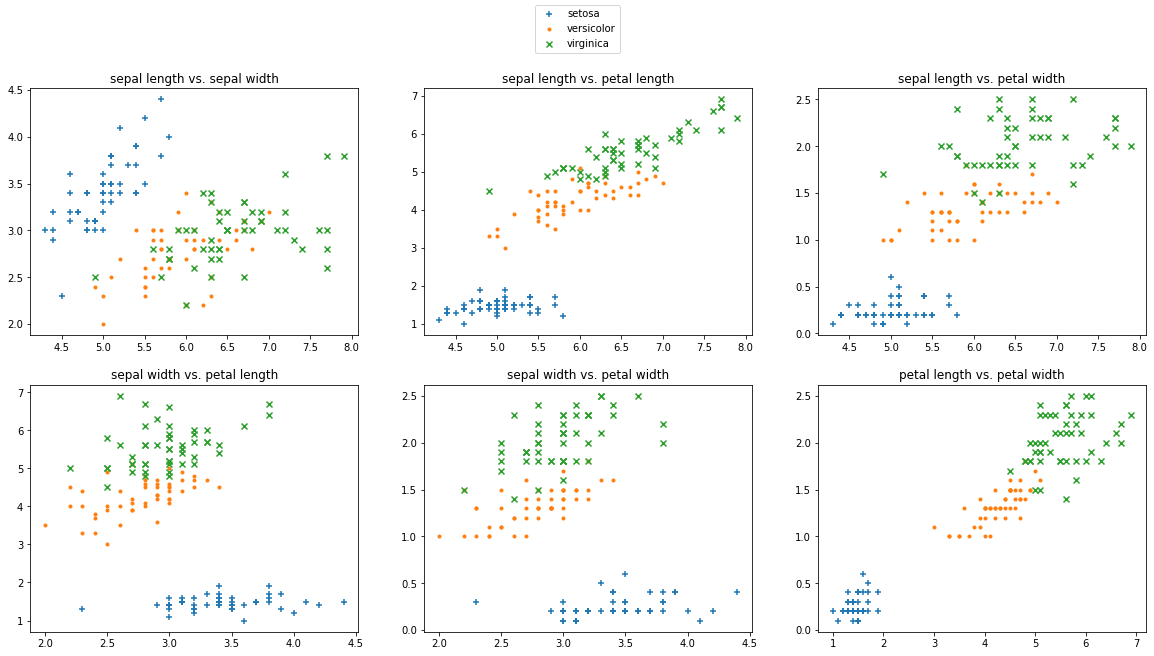

In [23]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
# plt.subplots_adjust(hspace=.5, wspace=1)
for row in range(2):
    for col in range(3):
        i, j = pairs[3*row+col]
        ax[row][col].set_title(f"{metrics[i]} vs. {metrics[j]}", fontsize=12)
        for mark, (species, points) in zip(marks, points_by_species.items()):
            xs = [point[i] for point in points]
            ys = [point[j] for point in points]
            ax[row][col].scatter(xs, ys, marker=mark, label=species)
fig.legend(['setosa', 'versicolor', 'virginica'], loc='upper center')
plt.show()

### 학습데이터와 평가데이터 분류

In [24]:
import random
# from machine_learning import split_data #위에서 선언함... 

In [25]:
random.seed(12)

iris_train, iris_test = split_data(iris_data, 0.70)
len(iris_train), len(iris_test)

(110, 40)

### 모델 평가

In [26]:
def knn_classify(k: int,
                 labeled_points: List[LabeledPoint],
                 new_point: Vector) -> str:
    
    # 레이블된 포인트를 가장 가까운 데이터부터 가장 먼 데이터 순서로 정렬
    by_distance = sorted(labeled_points,
                         key=lambda lp:distance(lp.point, new_point))
    
    # 가장 가까운 k 데이터 포인트의 레이블을 살펴보고
    k_nearest_labels = [lp.label for lp in by_distance[:k]]
    
    # 투표한다.
    return majority_vote(k_nearest_labels)

In [31]:
# confusion_matrix: Dict[Tuple[str,str], int] = defaultdict(int)
confusion_matrix = defaultdict(int)
num_correct = 0

for iris in iris_test:
    predicted = knn_classify(5, iris_train, iris.point)
    actual = iris.label
    
    if predicted == actual:
        num_correct += 1
        
    confusion_matrix[(predicted, actual)] += 1
    
pct_correct = num_correct / len(iris_test)
print(pct_correct, confusion_matrix)

0.975 defaultdict(<class 'int'>, {('setosa', 'setosa'): 11, ('versicolor', 'versicolor'): 10, ('virginica', 'versicolor'): 1, ('virginica', 'virginica'): 18})


## 12.3 차원의 저주

In [33]:
def random_point(dim:int)->Vector:
    return [random.random() for _ in range(dim)]

In [37]:
def random_distances(dim:int, num_pairs:int)->List[float]:
    return [distance(random_point(dim), random_point(dim)) for _ in range(num_pairs)]

In [48]:
# !pip3 install tqdm
import sys
import tqdm
_lib_path = 'c:\\users\\jongh\\anaconda3\\envs\\python\\lib\\site-packages'
sys.path.append(_lib_path)

In [52]:
dimensions = range(1, 101)
min_distances = []
avg_distances = []
for dim in tqdm.tqdm(dimensions, desc="Curse of Dimensionality"):
    distances = random_distances(dim, 10000)
    avg_distances.append(sum(distances)/10000)
    min_distances.append(min(distances))

Curse of Dimensionality: 100%|███████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.37it/s]


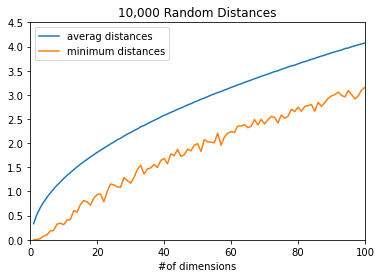

In [70]:
plt.plot(dimensions, avg_distances)
plt.plot(dimensions, min_distances)
plt.title("10,000 Random Distances")
plt.legend(['averag distances', 'minimum distances'])
plt.xlabel('#of dimensions')
plt.xlim(0, 100)
plt.ylim(0, 4.5)
plt.show()

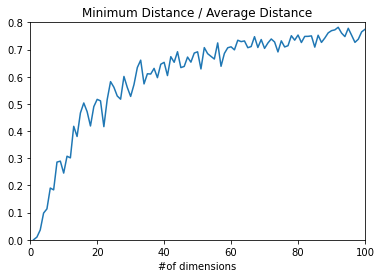

In [77]:
min_avg_ratio = [min_dist / avg_dist for min_dist, avg_dist \
                 in zip(min_distances, avg_distances)]
plt.plot(dimensions, min_avg_ratio)
plt.title("Minimum Distance / Average Distance")
plt.xlabel('#of dimensions')
plt.xlim(0, 100)
plt.ylim(0, .8)
plt.show()